In [17]:
import helpers
import numpy as np
import math
import re
from copy import deepcopy

data = """Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II"""
with open("input_16.txt", 'r') as f:
    data = f.read().rstrip()
    
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = [changeDict[x.split(" ")[0]] * int(x.split(" ")[1]) for x in data.split("\n") if x]
#data = [x.split('\n') for x in data.split('\n\n') if x]
#np.prod(sum(data))    
state = {}
flow_dictionary = {}
connected_dictionary = {}
state['valves_on'] = {}
for line in data.split('\n'):
    valves = line.split('valve')[1].replace(',', '')
    valves = [x for x in valves.split(' ') if len(x) > 1]
    split_line = line.split(' ')
    valve = split_line[1]
    flow = int(split_line[4].replace(';', '').split('=')[1])
    flow_dictionary[valve] = flow
    connected_dictionary[valve] = valves
    if flow == 0:
        state['valves_on'][valve] = True
    else:
        state['valves_on'][valve] = False
print(state)  
print(flow_dictionary)
connected_dictionary
    

{'valves_on': {'VR': False, 'UV': True, 'OH': True, 'GD': True, 'NS': True, 'KZ': False, 'AH': True, 'SA': True, 'VK': True, 'GB': True, 'AJ': False, 'PJ': True, 'KO': True, 'AA': True, 'TW': True, 'VG': False, 'BP': True, 'XH': True, 'TX': True, 'IR': False, 'TU': True, 'KC': True, 'LN': True, 'HD': True, 'KE': True, 'VY': True, 'LH': True, 'EM': True, 'SO': False, 'EC': True, 'KV': True, 'FE': True, 'TI': True, 'SC': False, 'ZP': True, 'RO': False, 'ZR': True, 'JL': False, 'PW': False, 'UL': True, 'GN': True, 'TN': True, 'NV': True, 'DI': False, 'IC': True, 'JF': True, 'LE': True, 'BS': True, 'JD': False, 'SP': False, 'NY': True, 'OM': False, 'GH': True, 'RI': False}}
{'VR': 11, 'UV': 0, 'OH': 0, 'GD': 0, 'NS': 0, 'KZ': 18, 'AH': 0, 'SA': 0, 'VK': 0, 'GB': 0, 'AJ': 6, 'PJ': 0, 'KO': 0, 'AA': 0, 'TW': 0, 'VG': 25, 'BP': 0, 'XH': 0, 'TX': 0, 'IR': 10, 'TU': 0, 'KC': 0, 'LN': 0, 'HD': 0, 'KE': 0, 'VY': 0, 'LH': 0, 'EM': 0, 'SO': 22, 'EC': 0, 'KV': 0, 'FE': 0, 'TI': 0, 'SC': 14, 'ZP': 0,

{'VR': ['LH', 'KV', 'BP'],
 'UV': ['GH', 'RO'],
 'OH': ['AJ', 'NY'],
 'GD': ['TX', 'PW'],
 'NS': ['AJ', 'AA'],
 'KZ': ['KO', 'VK', 'PJ'],
 'AH': ['ZP', 'DI'],
 'SA': ['VG', 'JF'],
 'VK': ['RO', 'KZ'],
 'GB': ['XH', 'AA'],
 'AJ': ['IC', 'OH', 'ZR', 'NS', 'EM'],
 'PJ': ['KZ', 'SP'],
 'KO': ['KZ', 'LE'],
 'AA': ['TW', 'GB', 'TI', 'NS', 'UL'],
 'TW': ['TU', 'AA'],
 'VG': ['SA'],
 'BP': ['RO', 'VR'],
 'XH': ['GB', 'RI'],
 'TX': ['RI', 'GD'],
 'IR': ['TN', 'NY', 'JF'],
 'TU': ['JD', 'TW'],
 'KC': ['SP', 'RO'],
 'LN': ['EM', 'RI'],
 'HD': ['FE', 'SC'],
 'KE': ['OM', 'RI'],
 'VY': ['PW', 'BS'],
 'LH': ['OM', 'VR'],
 'EM': ['AJ', 'LN'],
 'SO': ['ZP', 'FE'],
 'EC': ['OM', 'UL'],
 'KV': ['SP', 'VR'],
 'FE': ['SO', 'HD'],
 'TI': ['AA', 'PW'],
 'SC': ['HD'],
 'ZP': ['SO', 'AH'],
 'RO': ['UV', 'BP', 'VK', 'KC'],
 'ZR': ['OM', 'AJ'],
 'JL': ['GN', 'TN'],
 'PW': ['TI', 'GN', 'VY', 'GD', 'IC'],
 'UL': ['EC', 'AA'],
 'GN': ['JL', 'PW'],
 'TN': ['JL', 'IR'],
 'NV': ['RI', 'JD'],
 'DI': ['LE', 'AH'],
 'IC

In [21]:
state['time'] = 26
state['pressure'] = 0
max_pressure = 0
num_allowed_minute = {k: 50000  for k in range(0,31)}
print(num_allowed_minute)
def move(state, position, cameFrom):
    global num_allowed_minute
    #print(state['time'])
    global max_pressure
    state = deepcopy(state)
    if state['time'] == 0 or all(i for i in state['valves_on'].values()) or ((max_score(state, state['time']) + state['pressure']) <= max_pressure) or num_allowed_minute[state['time']] <= 0:
        if state['pressure'] > max_pressure:
            max_pressure = state['pressure']
            print(max_pressure)
        return
    
    if not state['valves_on'][position[0]]:
        state2 = deepcopy(state)
        position = deepcopy(position)
        #print(position)
        cameFrom = deepcopy(cameFrom)
        state2['valves_on'][position[0]] = True
        state2['time'] -= 1
        state2['pressure'] += state2['time'] * flow_dictionary[position[0]]
        cameFrom[0] = ""
        num_allowed_minute[state2['time']] -= 1
        elephant_move(state2, position, cameFrom)
    for movement in get_best_routes(state, position[0]):
        position = deepcopy(position)
        cameFrom = deepcopy(cameFrom)
        if not movement == cameFrom[0]:
            state2 = deepcopy(state)
            state2['time'] -= 1
            position[0] = movement
            cameFrom[0] = position[0]
            num_allowed_minute[state2['time']] -= 1
            elephant_move(state2, position, position)
            
            
def elephant_move(state, position, cameFrom):
    global num_allowed_minute
    state = deepcopy(state)
    if all(i for i in state['valves_on'].values()) or num_allowed_minute[state['time']] <= 0:
        return
    if not state['valves_on'][position[1]]:
        state2 = deepcopy(state)
        position = deepcopy(position)
        cameFrom = deepcopy(cameFrom)
        state2['valves_on'][position[1]] = True
        state2['pressure'] += state2['time'] * flow_dictionary[position[1]]
        cameFrom[1] = ""
        num_allowed_minute[state2['time']] -= 1
        move(state2, position, cameFrom)
        
    for movement in get_best_routes(state, position[1]):
        position = deepcopy(position)
        cameFrom = deepcopy(cameFrom)
        if not movement == cameFrom[1]:
            state2 = deepcopy(state)
            position[1] = movement
            cameFrom[1] = position[0]
            num_allowed_minute[state2['time']] -= 1
            move(state2, position, position)
    
        
move(state, ["AA","AA"], ["", ""])        
        
max_pressure

{0: 50000, 1: 50000, 2: 50000, 3: 50000, 4: 50000, 5: 50000, 6: 50000, 7: 50000, 8: 50000, 9: 50000, 10: 50000, 11: 50000, 12: 50000, 13: 50000, 14: 50000, 15: 50000, 16: 50000, 17: 50000, 18: 50000, 19: 50000, 20: 50000, 21: 50000, 22: 50000, 23: 50000, 24: 50000, 25: 50000, 26: 50000, 27: 50000, 28: 50000, 29: 50000, 30: 50000}
1350
1364
1373


KeyboardInterrupt: 

In [ ]:
1451 too low
1705 too low

In [18]:
def max_score(state, time):
    state = deepcopy(state)
    scores = []
    for k,v in state['valves_on'].items():
        if not v:
            scores.append(flow_dictionary[k])
    scores.sort()
    scores = list(reversed(scores))
    score = 0
    if not len(scores) % 2 == 0:
        scores.append(0)
    for val1, val2 in zip(scores[::2], scores[1::2]):
        if time <= 0:
            break
        time -= 1
        score += time * val1
        score += time * val2
        time -= 1
    return(score)

In [3]:
max_score(state, 3)

86

In [19]:
import networkx as nx
G = nx.Graph()


# Add the nodes to the graph
G.add_nodes_from(connected_dictionary.keys())

# Add the edges to the graph
for node, neighbors in connected_dictionary.items():
    for neighbor in neighbors:
        #print(neighbor)
        G.add_edge(node, neighbor)

# Print the graph
#nx.draw(G)

#routes = {k: v for k,v in nx.single_source_shortest_path(G, "DD").items() if not state['valves_on'][k]}
def get_best_routes(state, pos):
    routes = {k: [len(v), flow_dictionary[k], v[1]] for k,v in nx.single_source_shortest_path(G, pos).items() if not state['valves_on'][k] and len(v) > 1 }
    #print(routes)
    sorted_routes = [v[2] for k, v in sorted(routes.items(), key=lambda item: (item[1][0], -item[1][1]))]

    # Print the sorted dictionary
    #print(sorted_routes)
    return sorted(set(sorted_routes), key=lambda x: sorted_routes.index(x))

def get_best_routes_len(state, pos):
    routes = {k: [len(v), flow_dictionary[k], v[1]] for k,v in nx.single_source_shortest_path(G, pos).items() if not state['valves_on'][k] and len(v) > 1 }
    print(routes)
    sorted_routes = [[v[2], v[0]] for k, v in sorted(routes.items(), key=lambda item: (item[1][0], -item[1][1]))]

    # Print the sorted dictionary
    print(sorted_routes)
    return sorted(set(sorted_routes), key=lambda x: sorted_routes.index(x))
            
get_best_routes(state, "AA")

node_dict = {x: i for i,x in enumerate(G.nodes())}
distance_matrix = nx.floyd_warshall_numpy(G)
def get_distance(n1, n2):
    return int(distance_matrix[node_dict[n1], node_dict[n2]])
#get_best_routes_len(state, "AA")

In [5]:
state

{'valves_on': {'AA': True,
  'BB': False,
  'CC': False,
  'DD': False,
  'EE': False,
  'FF': True,
  'GG': True,
  'HH': False,
  'II': True,
  'JJ': False}}

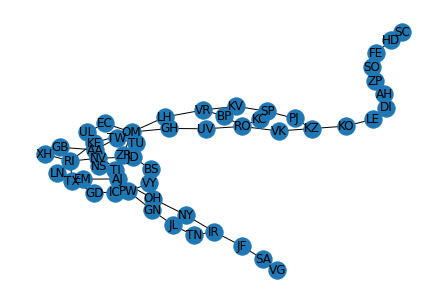

In [73]:
nx.draw(G, with_labels=True)

In [76]:
get_distance("VG", "SC")

22

In [ ]:
{'DD': [2, 20, 'DD'], 'BB': [2, 13, 'BB'], 'JJ': [3, 21, 'II'], 'EE': [3, 3, 'DD'], 'CC': [3, 2, 'DD'], 'HH': [6, 22, 'DD']}


In [ ]:
import itertools as it
#list(it.permutations('ABCD', 2))
to_visit = [x for x in state['valves_on'].keys() if not state['valves_on'][x]]
len(list(it.permutations(to_visit, len(to_visit))))

In [22]:
distance_matrix = nx.floyd_warshall_numpy(G)
distance_matrix

array([[0., 3., 5., ..., 2., 3., 4.],
       [3., 0., 5., ..., 2., 1., 4.],
       [5., 5., 0., ..., 3., 4., 4.],
       ...,
       [2., 2., 3., ..., 0., 1., 2.],
       [3., 1., 4., ..., 1., 0., 3.],
       [4., 4., 4., ..., 2., 3., 0.]])

In [42]:
node_dict = {x: i for i,x in enumerate(G.nodes())}
distance_matrix = nx.floyd_warshall_numpy(G)
def get_distance(n1, n2):
    return int(distance_matrix[node_dict[n1], node_dict[n2]])

get_distance("VR", "AA")

KeyError: 'VR'

In [ ]:
state['time'] = {}
state['time']['man'] = 26
state['time']['elephant'] = 26
state['pressure'] = 0
max_pressure = 0
num_allowed_minute = {k: 50000  for k in range(0,31)}
print(num_allowed_minute)
def move(state, position):
    global num_allowed_minute
    #print(state['time'])
    global max_pressure
    state = deepcopy(state)
    #or ((max_score(state, state['time']) + state['pressure']) <= max_pressure)
    if all(i for i in state['valves_on'].values()): #or num_allowed_minute[state['time']] <= 0:
        if state['pressure'] > max_pressure:
            max_pressure = state['pressure']
            print(max_pressure)
        return
    for possible_move in get_best_deluxe(state, position[0]):
        state2 = deepcopy(state)
        position2 = deepcopy(position)
        state2['time']['man'] -= (get_distance(position2[0], possible_move) + 1)
        if state2['time']['man'] <= 0:
            continue
        position2[0] = possible_move
        state2['valves_on'][possible_move] = True
        state2['pressure'] += state2['time']['man'] * flow_dictionary[possible_move]
        
        if state2['time']['man'] >= state2['time']['elephant']:
            move(state2, position2)
        if state2['time']['elephant'] >= state2['time']['man']:
            elephant_move(state2, position2)
    
    if state['pressure'] > max_pressure:
        max_pressure = state['pressure']
        print(max_pressure)
    
            
            
def elephant_move(state, position):
    global num_allowed_minute
    global max_pressure
    state = deepcopy(state)
    if all(i for i in state['valves_on'].values()): #or num_allowed_minute[state['time']] <= 0:
        if state['pressure'] > max_pressure:
            max_pressure = state['pressure']
            print(max_pressure)
        return
    for possible_move in get_best_deluxe(state, position[1]):
        state2 = deepcopy(state)
        position2 = deepcopy(position)
        state2['time']['elephant'] -= (get_distance(position2[1], possible_move) + 1)
        if state2['time']['elephant'] <= 0:
            continue
        position2[1] = possible_move
        state2['valves_on'][possible_move] = True
        state2['pressure'] += state2['time']['elephant'] * flow_dictionary[possible_move]
        if state2['time']['man'] >= state2['time']['elephant']:
            move(state2, position2)
        if state2['time']['elephant'] >= state2['time']['man']:
            elephant_move(state2, position2)
            
    if state['pressure'] > max_pressure:
        max_pressure = state['pressure']
        print(max_pressure)
    
        
move(state, ["AA","AA"])        
        
max_pressure

{0: 50000, 1: 50000, 2: 50000, 3: 50000, 4: 50000, 5: 50000, 6: 50000, 7: 50000, 8: 50000, 9: 50000, 10: 50000, 11: 50000, 12: 50000, 13: 50000, 14: 50000, 15: 50000, 16: 50000, 17: 50000, 18: 50000, 19: 50000, 20: 50000, 21: 50000, 22: 50000, 23: 50000, 24: 50000, 25: 50000, 26: 50000, 27: 50000, 28: 50000, 29: 50000, 30: 50000}
1871
1964
1982
1994
1997
2298
2319
2362
2383
2398
2400
2408


In [20]:
def get_best_deluxe(state, position):
    sorted_routes = [[get_distance(position, k), k, flow_dictionary[k]] for k,v in state['valves_on'].items() if not v]
    sorted_routes = [x[1] for x in list(sorted(sorted_routes, key=lambda x: (x[0], x[2])))]
    return(sorted_routes)
    #sorted(set(sorted_routes), key=lambda x: sorted_routes.index(x))

In [ ]:
#2498 too low